# Przykład wykorzystania algorytmu Symulowanego Wyżarzania:

Importowanie bibliotek

In [1]:
from typing import Tuple, Union
from numpy.random import randint
from numpy import exp

import matplotlib.pyplot as plt

from SimulatedAnnealing.Algorithm import generate_sa_algorithm
from SimulatedAnnealing.Visualisation import plot_scope

__Definicja funkcji kosztu__
$$
f(x, y) = x^2 + y^2
$$

Definiowanie wszystkich potrzebnych funkcji:

In [2]:
def cost_fun(vec):
    (x, y) = vec

    return x**2 + y**2

def sol_gen_fun(vec):
    (x, y) = vec
    step = 0.01

    if randint(2) == 0:
        if randint(2) == 0:
            x += step
        else:
            x -= step
    else:
        if randint(2) == 0:
            y += step
        else:
            y -= step

    if x < -5:
        x = -5
    if x > 5:
        x = 5
    if y < -5:
        y = -5
    if y > 5:
        y = 5

    return x, y

def colling_fun(_, k):
    temp = (1 - (k + 1) / max_iter) * start_temp

    if temp <= 10**(-9):
        return 0.0001
    return temp

def prob_fun(delta_en, temp):
    if delta_en < 0:
        return 1
    return exp(-delta_en / (1.380649 * temp))

Wygenerowanie algorytmu

In [3]:
solution_type = Tuple[Union[int, float], Union[int, float]]
sim_an = generate_sa_algorithm(solution_type)

Definicja parametrów symulacji

In [4]:
max_iter = 1000000
start_temp = 0.1
init_sol_tup = (2, -2)

Wykonanie algorytmu

In [5]:
sol, scope = sim_an(cost=cost_fun,
                    init_sol=init_sol_tup,
                    sol_gen=sol_gen_fun,
                    init_temp=start_temp,
                    cool=colling_fun,
                    probability=prob_fun,
                    max_iterations=max_iter)

Analiza wyników

Solution = (0.6000000000000629, -4.670000000000007)


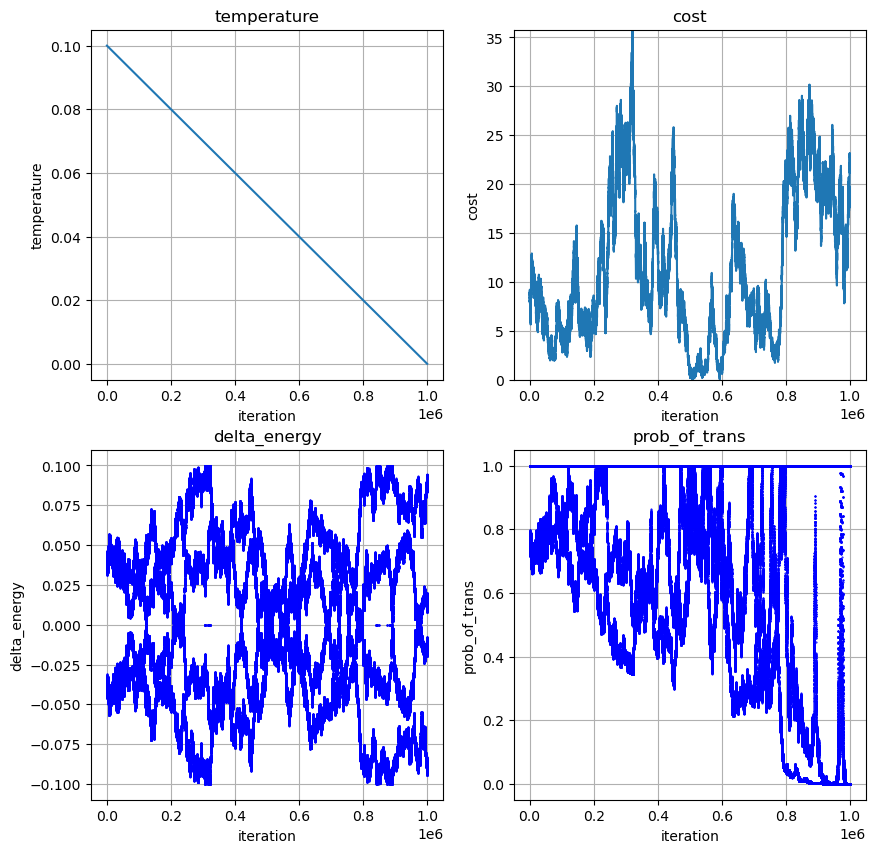

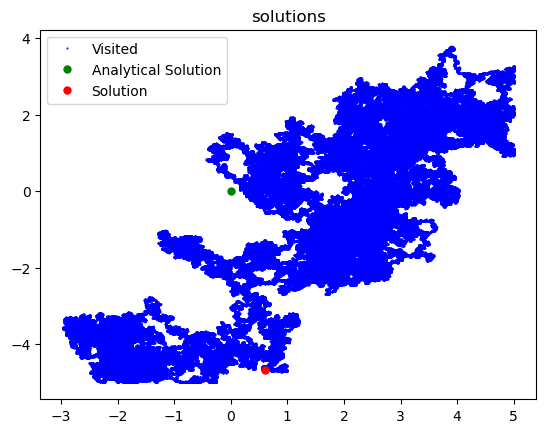

In [6]:
print(f'Solution = {sol}')

plot_scope(scope)

x_vec = [tup[0] for tup in scope.visited_solution]
y_vec = [tup[1] for tup in scope.visited_solution]

plt.plot(x_vec, y_vec, 'b.', markersize=1, label='Visited')
plt.plot(0, 0, 'g.', markersize=10, label='Analytical Solution')
plt.plot(sol[0], sol[1], 'r.', markersize=10, label='Solution')
plt.title('solutions')
plt.legend()
plt.show()

__Modyfikacja funkcji chłodzenia__

In [7]:
def colling_fun(_, k):
    temp = start_temp * exp(-k / max_iter * 10)

    return temp

In [8]:
sol, scope = sim_an(cost=cost_fun,
                    init_sol=init_sol_tup,
                    sol_gen=sol_gen_fun,
                    init_temp=start_temp,
                    cool=colling_fun,
                    probability=prob_fun,
                    max_iterations=max_iter)

Solution = (4.759999999999881, 3.129999999999979)


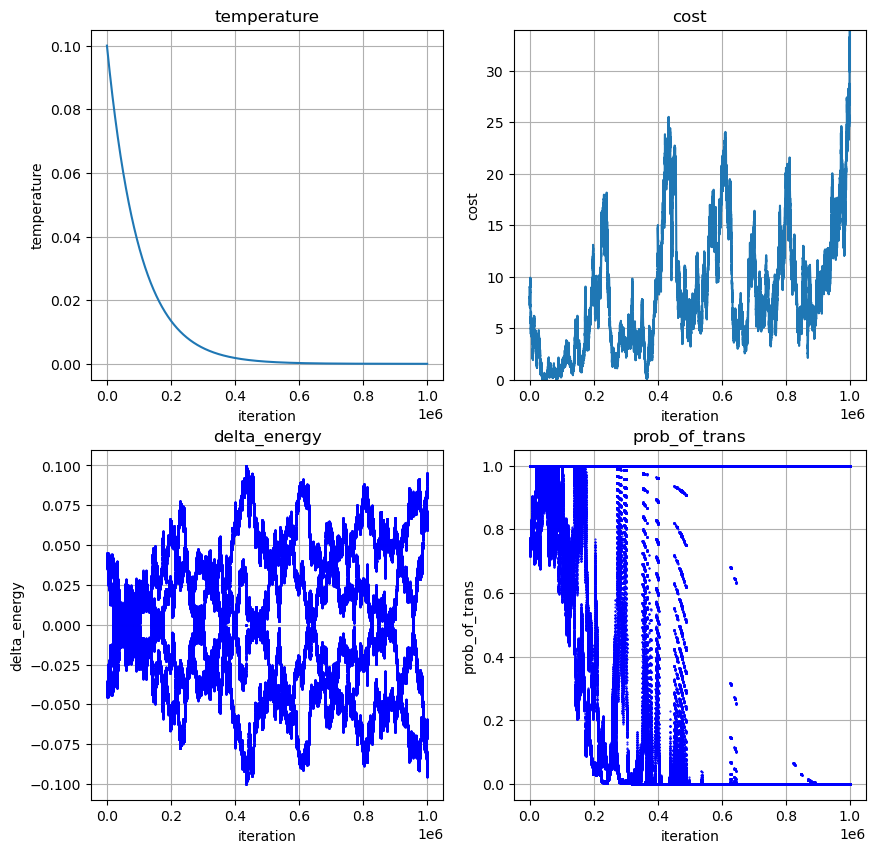

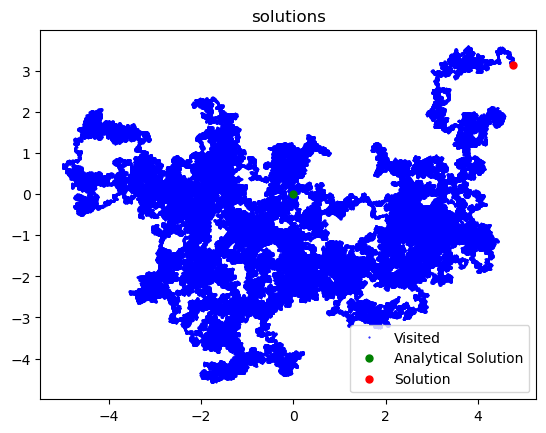

In [9]:
print(f'Solution = {sol}')

plot_scope(scope)

x_vec = [tup[0] for tup in scope.visited_solution]
y_vec = [tup[1] for tup in scope.visited_solution]

plt.plot(x_vec, y_vec, 'b.', markersize=1, label='Visited')
plt.plot(0, 0, 'g.', markersize=10, label='Analytical Solution')
plt.plot(sol[0], sol[1], 'r.', markersize=10, label='Solution')
plt.title('solutions')
plt.legend()
plt.show()